In [1]:
!pip install -U scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [2]:
!python -m pip show scikit-learn

Name: scikit-learn
Version: 1.3.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /home/ahmad/AI_Lab/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


In [3]:
! python -m pip freeze

anyio==4.0.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
asttokens==2.4.0
async-lru==2.0.4
attrs==23.1.0
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.12.2
bleach==6.0.0
certifi==2023.7.22
cffi==1.15.1
charset-normalizer==3.2.0
comm==0.1.4
contourpy==1.1.1
cryptography==41.0.4
cycler==0.11.0
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.1.3
executing==1.2.0
fastjsonschema==2.18.0
fonttools==4.42.1
fqdn==1.5.1
idna==3.4
ipykernel==6.25.2
ipython==8.15.0
ipython-genutils==0.2.0
ipywidgets==8.1.1
isoduration==20.11.0
jedi==0.19.0
Jinja2==3.1.2
joblib==1.3.2
json5==0.9.14
jsonpointer==2.4
jsonschema==4.19.1
jsonschema-specifications==2023.7.1
jupyter==1.0.0
jupyter-console==6.6.3
jupyter-events==0.7.0
jupyter-lsp==2.2.0
jupyter_client==8.3.1
jupyter_core==5.3.1
jupyter_server==2.7.3
jupyter_server_terminals==0.4.4
jupyterlab==4.0.6
jupyterlab-pygments==0.2.2
jupyterlab-widgets==3.0.9
jupyterlab_server==2.25.0
kiwisolver==1.4.5
MarkupSafe==2.1.3
mat

In [5]:
!python -c "import sklearn; sklearn.show_versions()"


System:
    python: 3.10.11 (main, Apr 20 2023, 19:02:41) [GCC 11.2.0]
executable: /home/ahmad/AI_Lab/bin/python
   machine: Linux-6.2.0-34-generic-x86_64-with-glibc2.35

Python dependencies:
      sklearn: 1.3.1
          pip: 23.2.1
   setuptools: 65.5.0
        numpy: 1.26.0
        scipy: 1.11.3
       Cython: None
       pandas: 2.1.1
   matplotlib: 3.8.0
       joblib: 1.3.2
threadpoolctl: 3.2.0

Built with OpenMP: True

threadpoolctl info:
       user_api: openmp
   internal_api: openmp
    num_threads: 8
         prefix: libgomp
       filepath: /home/ahmad/AI_Lab/lib/python3.10/site-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
        version: None

       user_api: blas
   internal_api: openblas
    num_threads: 8
         prefix: libopenblas
       filepath: /home/ahmad/AI_Lab/lib/python3.10/site-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
        version: 0.3.23.dev
threading_layer: pthreads
   architecture: SkylakeX

       user_api: blas
   intern

In [6]:
import numpy as np
def true_fun(X):
    return np.sin(1.5 * np.pi * X)
np.random.seed(0)
n_samples = 40
X = np.random.rand(n_samples)
X_train = np.sort(X[:n_samples//2])
y_train = true_fun(X_train) + np.random.randn(n_samples//2) * 0.1
X_test = np.sort(X[n_samples//2:])
y_test = true_fun(X_test) + np.random.randn(n_samples//2) * 0.1

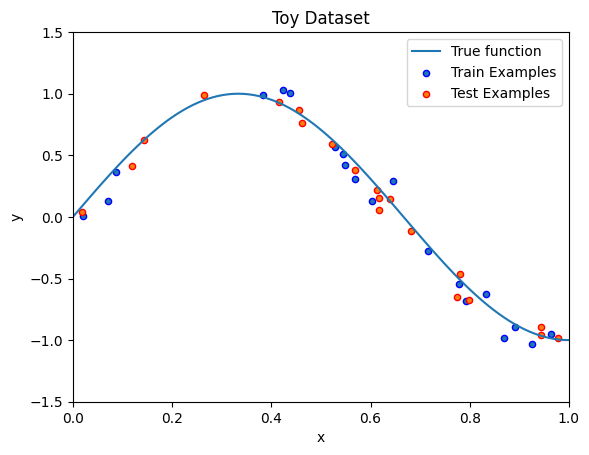

In [7]:
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.scatter(X_test, y_test, edgecolor="r", s=20, label="Test Examples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Toy Dataset")
plt.show()

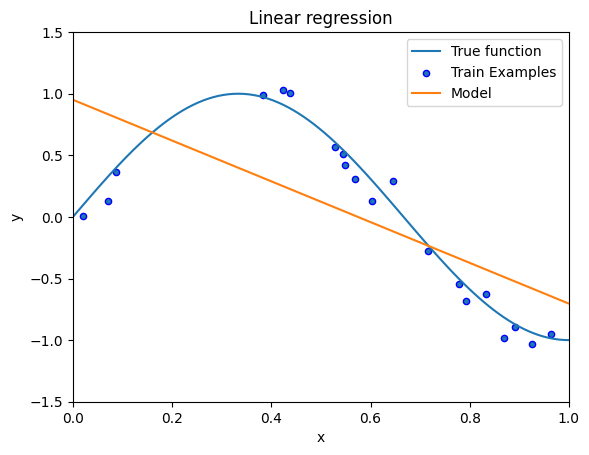

In [8]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train[:, np.newaxis], y_train)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.plot(x, linear_regression.predict(x[:, np.newaxis]), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Linear regression")
plt.show()

In [11]:
# Task 1
y = linear_regression.predict(X_test[:, np.newaxis])
u = (y - y_test) ** 2
u = np.sum(u)
u

3.472978188261996

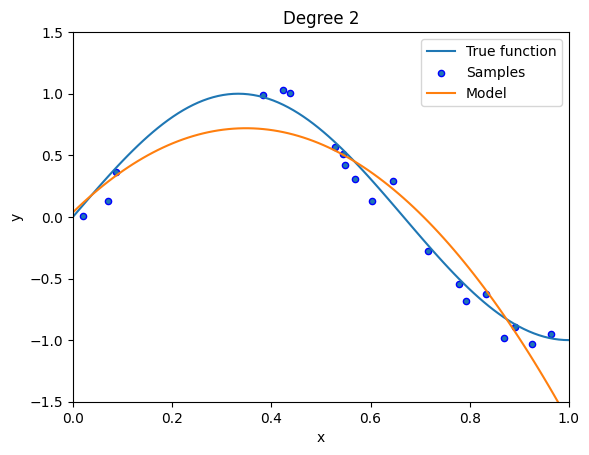

1.1253203639423828

In [18]:
from sklearn.preprocessing import PolynomialFeatures
def poly_reg(X_train, y_train, X_test, y_test, degree = 2):
    polynomial_features = PolynomialFeatures(degree, include_bias=True)
    q_model = LinearRegression()
    q_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]),
    y_train)
    x = np.linspace(0, 1, 100)
    plt.plot(x, true_fun(x), label="True function")
    plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
    plt.plot(x, q_model.predict(polynomial_features.fit_transform(x[:,
    np.newaxis])), label="Model")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1.5, 1.5))
    plt.legend(loc="best")
    plt.title("Degree 2")
    plt.show()
    y = q_model.predict(polynomial_features.fit_transform(X_test[:, np.newaxis]))
    u = (y - y_test) ** 2
    u = np.sum(u)
    return u
poly_reg(X_train, y_train, X_test, y_test)

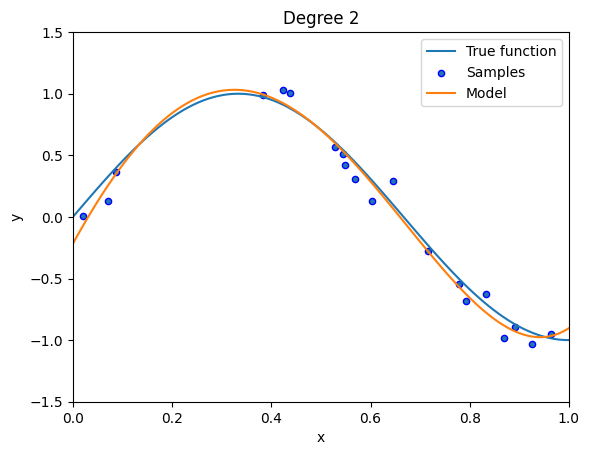

0.09283598599625405

In [19]:
poly_reg(X_train, y_train, X_test, y_test, 4)

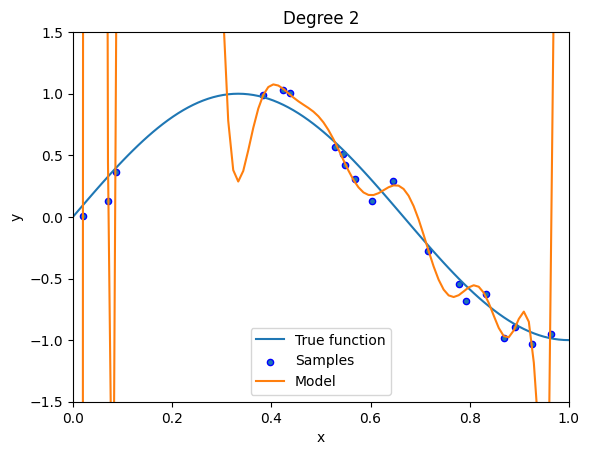

10079.136717539466

In [23]:
poly_reg(X_train, y_train, X_test, y_test, 15)

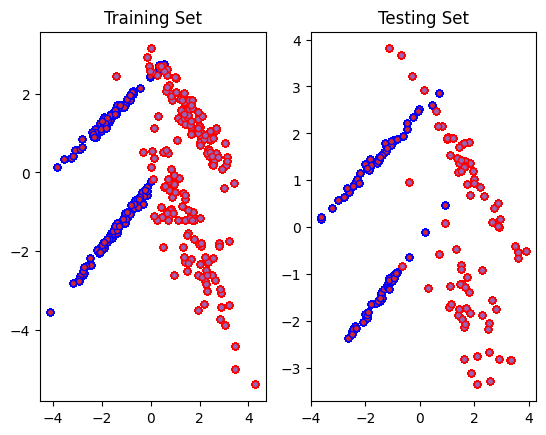

In [56]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, random_state=42, 
                           shuffle=True, class_sep=1.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
colors = ["b", "r"]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Training Set")
ax2.set_title("Testing Set")
for c in y_train:
    ax1.scatter([X_train[i, 0] for i in np.where(y_train==c)] ,
    [X_train[i, 1] for i in np.where(y_train==c)],
    edgecolor=colors[c], s=20, label="Samples")
    ax2.scatter([X_test[i, 0] for i in np.where(y_test==c)] ,
    [X_test[i, 1] for i in np.where(y_test==c)],
    edgecolor=colors[c], s=20, label="Samples")

Training Accuracy:  0.9671641791044776
Testing Accuracy:  0.8787878787878788
              precision    recall  f1-score   support

           0    0.84043   0.94048   0.88764        84
           1    0.92958   0.81481   0.86842        81

    accuracy                        0.87879       165
   macro avg    0.88500   0.87765   0.87803       165
weighted avg    0.88419   0.87879   0.87821       165



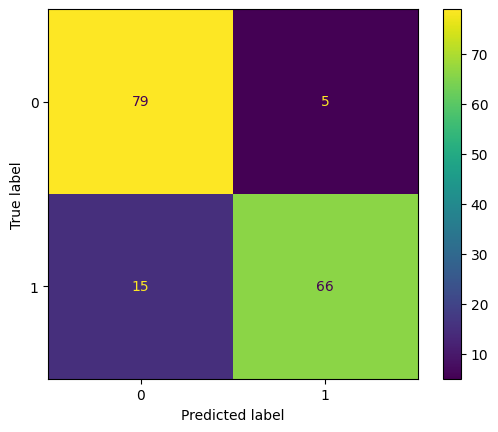

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, precision_recall_fscore_support

def random_forrest(X_train, y_train, X_test, y_test, n_estimators=2, plot=False):
    clf = RandomForestClassifier(n_estimators=n_estimators,
    criterion="entropy",
    max_features="sqrt", max_samples=.8,
    random_state=0)
    clf.fit(X_train, y_train)
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    
    print("Training Accuracy: ",clf.score(X_train, y_train))
    print("Testing Accuracy: ",clf.score(X_test, y_test))
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    if plot:
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
        display_labels=clf.classes_)
        disp.plot()
    return classification_report(y_test,y_pred,digits = 5), train_accuracy, test_accuracy
print(random_forrest(X_train, y_train, X_test, y_test, plot=True)[0])

In [58]:
for i in range(1, 20):
    _, training_accuracy, test_accuracy = random_forrest(X_train, y_train, X_test, y_test, i)
    print(f"For trees = {i}, the training accuracy was {training_accuracy} and the testing was {test_accuracy}")

Training Accuracy:  0.9850746268656716
Testing Accuracy:  0.9515151515151515
For trees = 1, the training accuracy was 0.9850746268656716 and the testing was 0.9515151515151515
Training Accuracy:  0.9671641791044776
Testing Accuracy:  0.8787878787878788
For trees = 2, the training accuracy was 0.9671641791044776 and the testing was 0.8787878787878788
Training Accuracy:  0.9850746268656716
Testing Accuracy:  0.896969696969697
For trees = 3, the training accuracy was 0.9850746268656716 and the testing was 0.896969696969697
Training Accuracy:  0.991044776119403
Testing Accuracy:  0.9030303030303031
For trees = 4, the training accuracy was 0.991044776119403 and the testing was 0.9030303030303031
Training Accuracy:  0.9940298507462687
Testing Accuracy:  0.9515151515151515
For trees = 5, the training accuracy was 0.9940298507462687 and the testing was 0.9515151515151515
Training Accuracy:  0.9880597014925373
Testing Accuracy:  0.9515151515151515
For trees = 6, the training accuracy was 0.9880

In [59]:
print(classification_report(y_test,y_pred,digits = 5))

              precision    recall  f1-score   support

           0    0.45055   0.48810   0.46857        84
           1    0.41892   0.38272   0.40000        81

    accuracy                        0.43636       165
   macro avg    0.43473   0.43541   0.43429       165
weighted avg    0.43502   0.43636   0.43491       165



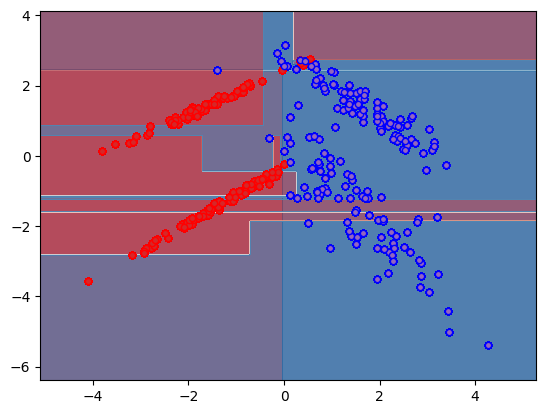

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
def random_cmap(X_train, y_train, X_test, y_test, n_estimators=2, plot=False):
    cmap = plt.cm.RdBu
    plot_step = 0.02 # fine step width for decision surface contours
    clf = RandomForestClassifier(n_estimators=n_estimators, criterion="entropy",
    max_features="sqrt", max_samples=.8,
    random_state=0)
    clf.fit(X_train, y_train)
    # Now plot the decision boundary using a fine mesh as input to a
    # filled contour plot
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step),
    np.arange(y_min, y_max, plot_step))
    estimator_alpha = 1.0 / len(clf.estimators_)
    for tree in clf.estimators_:
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)
    colors = ["r", "b"]
    for c in y_train:
        plt.scatter([X_train[i, 0] for i in np.where(y_train==c)] ,
        [X_train[i, 1] for i in np.where(y_train==c)],
        edgecolor=colors[c], s=20, label="Samples")
random_cmap(X_train, y_train, X_test, y_test)

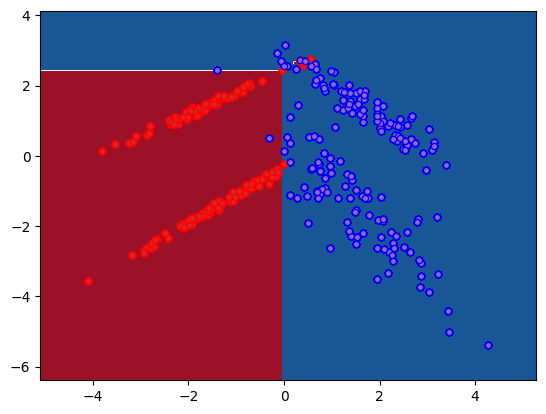

In [61]:
random_cmap(X_train, y_train, X_test, y_test, 1)

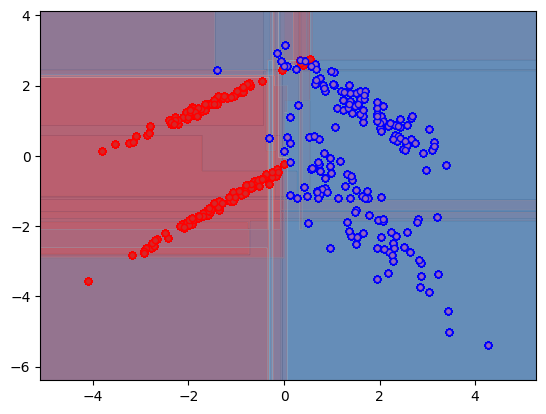

In [62]:
random_cmap(X_train, y_train, X_test, y_test, 8)

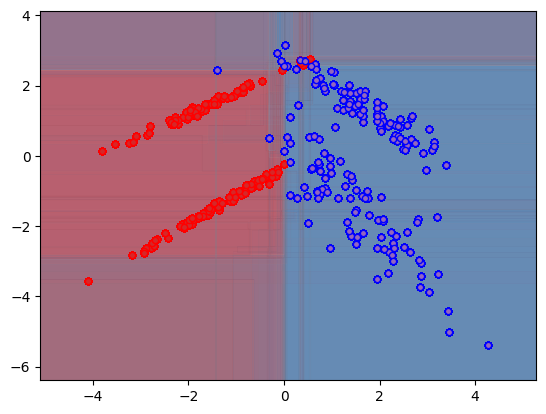

In [64]:
random_cmap(X_train, y_train, X_test, y_test, 40)

In [65]:
from sklearn import svm
clf = svm.SVC(kernel="linear", C=100)
clf.fit(X_train, y_train)
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ",clf.score(X_test, y_test))

Training Accuracy:  0.9731343283582089
Testing Accuracy:  0.9333333333333333


In [68]:
def svm_cmap(X_train, y_train, X_test, y_test, C=100, kernel='linear'):
    cmap = plt.cm.RdBu
    plot_step = 0.02  # fine step width for decision surface contours
    
    clf = svm.SVC(kernel=kernel, C=C)
    clf.fit(X_train, y_train)
    
    # Now plot the decision boundary using a fine mesh as input to a
    # filled contour plot
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step),
        np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=cmap)
    
    colors = ["r", "b"]
    unique_classes = np.unique(y_train)
    for i, c in enumerate(unique_classes):
        plt.scatter(X_train[y_train == c, 0], X_train[y_train == c, 1],
                    color=colors[i], edgecolor='k', s=20, label=f"Class {c}")
    
    plt.legend()
    plt.show()

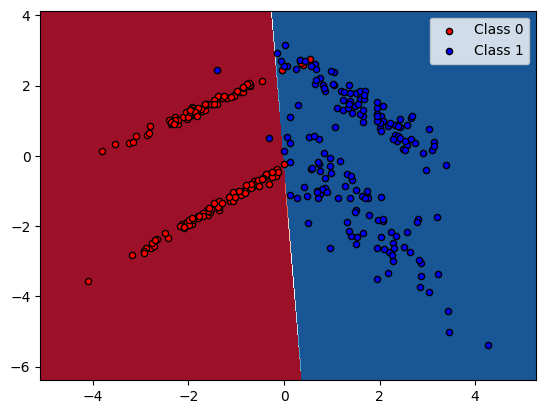

In [70]:
svm_cmap(X_train, y_train, X_test, y_test)

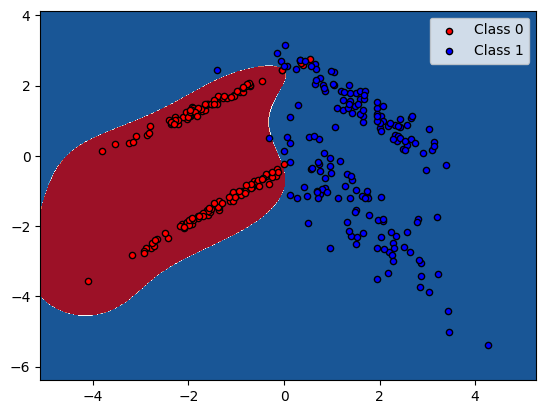

In [69]:
svm_cmap(X_train, y_train, X_test, y_test, C=100, kernel='rbf')

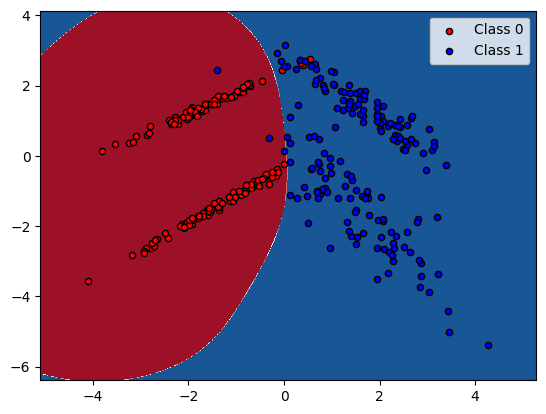

In [71]:
svm_cmap(X_train, y_train, X_test, y_test, C=0.5, kernel='rbf')

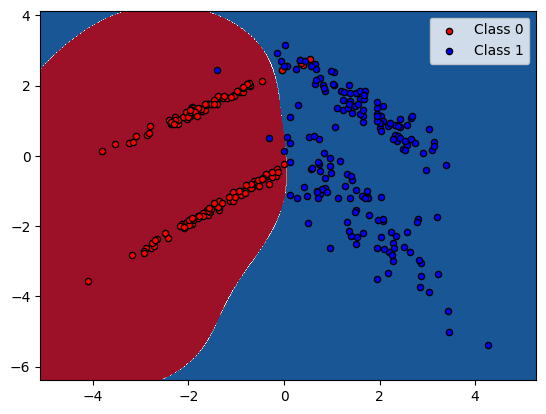

In [72]:
svm_cmap(X_train, y_train, X_test, y_test, C=1, kernel='rbf')

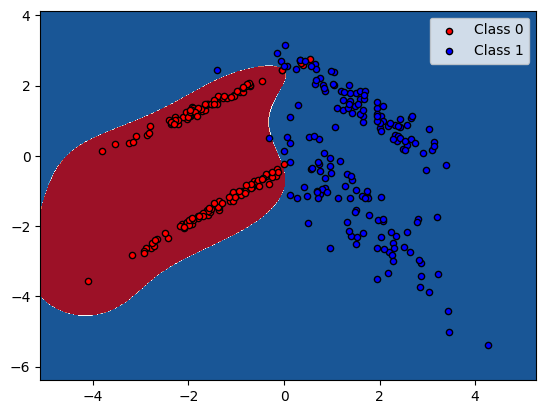

In [73]:
svm_cmap(X_train, y_train, X_test, y_test, C=100, kernel='rbf')

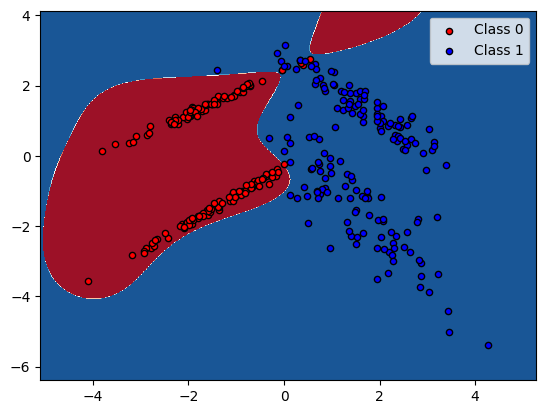

In [74]:
svm_cmap(X_train, y_train, X_test, y_test, C=1000, kernel='rbf')

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters = {"kernel":("linear", "rbf"), "C":[1, 10, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [77]:
clf.cv_results_

{'mean_fit_time': array([0.00069008, 0.00077629, 0.00085311, 0.00069857, 0.00137043,
        0.00085497]),
 'std_fit_time': array([6.53591563e-05, 1.45487307e-04, 1.79895146e-04, 8.81355806e-05,
        2.97896282e-04, 9.89908658e-05]),
 'mean_score_time': array([0.0003686 , 0.00048094, 0.00038605, 0.00043101, 0.00042315,
        0.00039773]),
 'std_score_time': array([3.05246554e-05, 1.03687404e-04, 7.30512970e-05, 1.09139099e-04,
        5.17001000e-05, 4.48747596e-05]),
 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 100, '